In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, exp
import pandas as pd
import time

# Setting Up Useful Functions

In [16]:
a=np.random.randn(3,3)

b = np.random.randn(3, 1)

c = a*b
print(a, "\n \n", b, "\n \n", c)

[[-1.84044257 -0.72752246  2.09179054]
 [-1.95520905  0.58688437  0.48921804]
 [-0.73029472 -0.53453129  0.5191694 ]] 
 
 [[ 0.5558435 ]
 [-1.21384775]
 [-0.74032852]] 
 
 [[-1.02299804 -0.40438863  1.16270817]
 [ 2.37332612 -0.71238828 -0.59383622]
 [ 0.54065801  0.39572876 -0.38435591]]


In [10]:
def sigmoid(z):
    return(1./(1+exp(-1*z)))

def loss(hypo, y):
    return(-1*y*log(hypo) - (1-y)*log(1-hypo))

def cost(hypo,y):
    loss = (-1*y*log(hypo) - (1-y)*log(1-hypo))
    return(loss.mean())

In [18]:
1 - np.array([1,3,4]) * np.array([4,1,5])

array([ -3,  -2, -19])

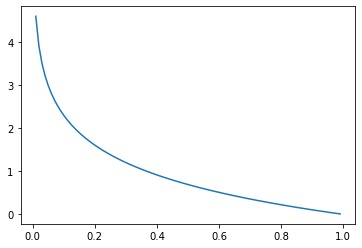

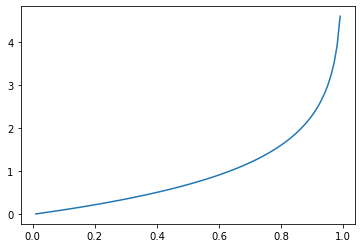

In [290]:
plt.plot(np.linspace(0.01,.99,100), loss(np.linspace(0.01,.99,100), 1))
plt.show()
plt.plot(np.linspace(0.01,.99,100), loss(np.linspace(0.01,.99,100), 0))
plt.show()

In [311]:
def hypo(x,weights,bias):
    z = np.dot(x,weights)+bias
    return(sigmoid(z))

# Data Cleaning and Normalization

In [312]:
df = pd.read_csv('car_data.csv')
df['Male'] = (df['Gender']=='Male').astype(int)
df['Female'] = (df['Gender']=='Female').astype(int)

In [313]:
def normalize(df, col):
    df[col] = (df[col] - df[col].mean())/(df[col].std())

In [314]:
normalize(df, 'Age')
normalize(df, 'AnnualSalary')

In [315]:
X = df[['Male', 'Female', 'Age', 'AnnualSalary']].iloc[:667].to_numpy() # training set
y = df['Purchased'].iloc[:667].to_numpy()

test = df[['Male', 'Female', 'Age', 'AnnualSalary']].iloc[667:].to_numpy()
ytest = df['Purchased'].iloc[667:].to_numpy()
m, n = X.shape

# Initialize Weights and Train

In [316]:
iters = 10000
alpha = 0.0005
epsilon = .001
delta = [.4]
J=[]

w = np.zeros(n)
b = 0

t1=time.time()
while(iters>0 and delta[-1]>epsilon):
    J.append(cost(hypo(X,w,b), y))
    dw = np.dot(np.transpose(X), (hypo(X, w, b)-y))
    delta.append(abs(sum(dw/m)))
    w = w - (alpha/m)*dw
    b = b - alpha*(h-y).mean()
    iters -= 1
print("TIME: ", 1000*(time.time() - t1))
print(iters)
print(J[-1])
print(delta[-1])

TIME:  643.3990001678467
0
0.43114676830404336
0.18529678904619953


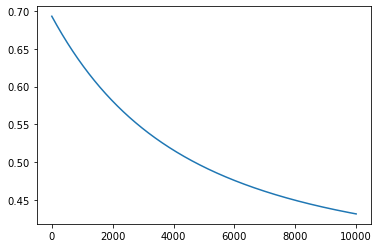

In [317]:
plt.plot(J)

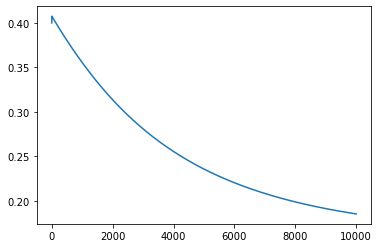

In [318]:
plt.plot(delta)

In [319]:
print(w, b)

[-0.06117656 -0.08484488  0.92944803  0.49241063] -0.46851574212901836


In [320]:
predictions = hypo(test, w, b)

In [321]:
cost(predictions, ytest)

0.46122101289750184

In [324]:
y

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [322]:
hypo(X,w,b)

array([0.15120249, 0.27775147, 0.56490333, 0.48953242, 0.14793476,
       0.37415363, 0.69258593, 0.38004952, 0.22063002, 0.32137149,
       0.43514335, 0.34509174, 0.22102278, 0.1284142 , 0.52877016,
       0.47984269, 0.28091389, 0.22200157, 0.51800561, 0.55626188,
       0.27850347, 0.43479894, 0.5006644 , 0.34626283, 0.33091909,
       0.10550243, 0.48774865, 0.45396762, 0.37945063, 0.58223261,
       0.31616208, 0.21291627, 0.27376648, 0.41220869, 0.59081813,
       0.40126005, 0.27116252, 0.48690087, 0.41075632, 0.07057757,
       0.06213433, 0.64860438, 0.32350005, 0.452489  , 0.60645081,
       0.3172759 , 0.56785675, 0.29686806, 0.6773038 , 0.32374988,
       0.41256317, 0.47128483, 0.82603816, 0.09368746, 0.45064905,
       0.42430375, 0.36001608, 0.64272684, 0.38537859, 0.51609086,
       0.69658317, 0.3766231 , 0.61324491, 0.32325032, 0.13272147,
       0.15490389, 0.26488881, 0.62843591, 0.2999745 , 0.25657137,
       0.35706883, 0.47250268, 0.11126895, 0.35112658, 0.64068

In [233]:
t1= time.time()
v=alpha * np.average(h)
t2=time.time()
print(1000*(t2-t1), " from average(): ", v)

t1= time.time()
v=alpha * h.mean()
t2=time.time()
print(1000*(t2-t1), " from mean(): ", v)

t1= time.time()
v=alpha * h.sum() / m
t2=time.time()
print(1000*(t2-t1), " from sum() ", v)

0.5068778991699219  from average():  0.0025
0.12803077697753906  from mean():  0.0025
0.13184547424316406  from sum()  0.0025
